In [35]:
#mount the google colab to access gdrive data
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
#go into the folder and unzip provided file
%cd "/content/gdrive/MyDrive/"
#!unzip TP1_data.zip - content already unzipped

/content/gdrive/MyDrive


In [37]:
#import needed packages
import numpy as np
import os
from skimage.feature import BRIEF, corner_peaks, corner_fast, match_descriptors, plot_matches
from skimage.feature.texture import local_binary_pattern
import matplotlib.pyplot as plt
import cv2

In [40]:
%cd 'TP1_data'

/content/gdrive/MyDrive/TP1_data/TP1_data


In [41]:
query_image = cv2.imread("airplane_query.jpg",cv2.IMREAD_GRAYSCALE)
image_dictionary = {}
directory = 'database'
files = os.listdir(directory)

In [42]:
%cd 'database'
index = 0
while index < len(files):
    filename = files[index]
    if filename.endswith('.jpg'):
        image_dictionary[index] = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    index += 1
%cd ..
#go back to TP1_data if i want to rerun

/content/gdrive/MyDrive/TP1_data/TP1_data/database
/content/gdrive/MyDrive/TP1_data/TP1_data


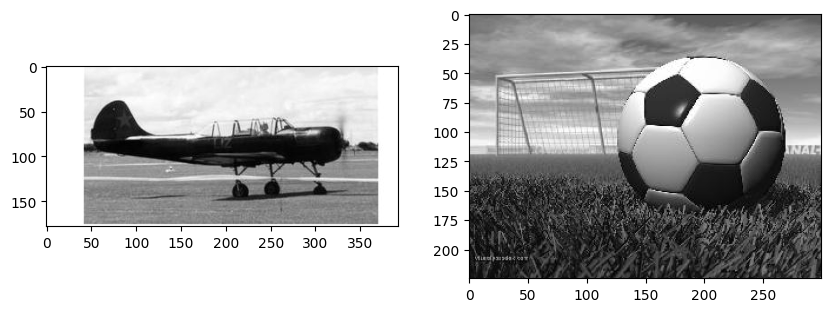

In [43]:
#plot images to show they are uploaded successfully and what they should look like example
f, axarr = plt.subplots(1, 2, figsize=(10,10))
axarr[0].imshow(query_image,cmap = plt.get_cmap('gray'))
axarr[1].imshow(image_dictionary[25],cmap = plt.get_cmap('gray'))
plt.show()

In [ ]:
#solve the task of content-based image retrieval (CBIR).
#characterize each image using descriptors derived from GLCM and LBP and then find the images that correspond to each request image by measuring the similarity between these descriptors
#compare the two approaches in terms of efficiency (computation time) and performance.
# evaluate their performance based only on the result of the 3 most similar image
#You have to compare two methods of description: the first method is based on Co-occurrence Matrices (CM), the second one is based on Local Binary Patterns (LBP

In [44]:
def LBPAnalysis(query_image,image_database,P,R):

  """
  inputs: query_image: Image to compare image database to
          image_database: Database of images query image will be compared to
          P: n neighbors
          R: radius

  output: top_ten: top ten most similar images
  """
  codes = {}
  for i in range(len(image_database)):
    codes[i] = local_binary_pattern(image_database[i], P, R) #outputs LBP image for all images in database

  hist = {}
  for i in range(len(codes)):
    hist[i], _ = np.histogram(codes[i], 256, range=(0, 256)) #256 possible outcomes with 8 pixel neightborhood, the descriptors
    hist[i] = hist[i].astype("float")
    hist[i] /= (hist[i].sum() + 1e-6) #normalize

  query_code = local_binary_pattern(query_image, P, R) #outputs LBP image for all images in database
  hist_q, _ = np.histogram(query_code, 256, range=(0, 256)) #256 possible outcomes with 8 pixel neightborhood, the descriptors
  #normalize the histogram
  plt.hist(hist_q)
  hist_q = hist_q.astype("float")
  hist_q /= (hist_q.sum() + 1e-6)


  Euclidian_distances = np.zeros(len(hist))
  for i in range(len(hist)):
    Euclidian_distances[i] = Euclidean_distance(hist_q, hist[i])


  s = Euclidian_distances
  best_list = sorted(range(len(s)), key=lambda k: s[k])
  top_ten = best_list[0:10]

  return top_ten

def Euclidean_distance(p, q):
    dist = np.sqrt(np.sum(np.square(p-q)))
    return dist

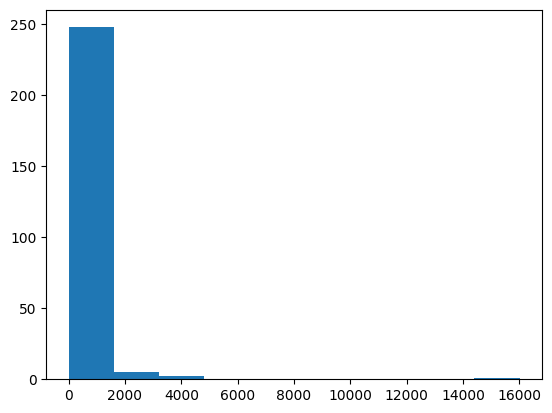

In [45]:
image_database = image_dictionary
P = 8
R = 1
query_image = cv2.imread("airplane_query.jpg",cv2.IMREAD_GRAYSCALE)
best = LBPAnalysis(query_image,image_database,P,R)

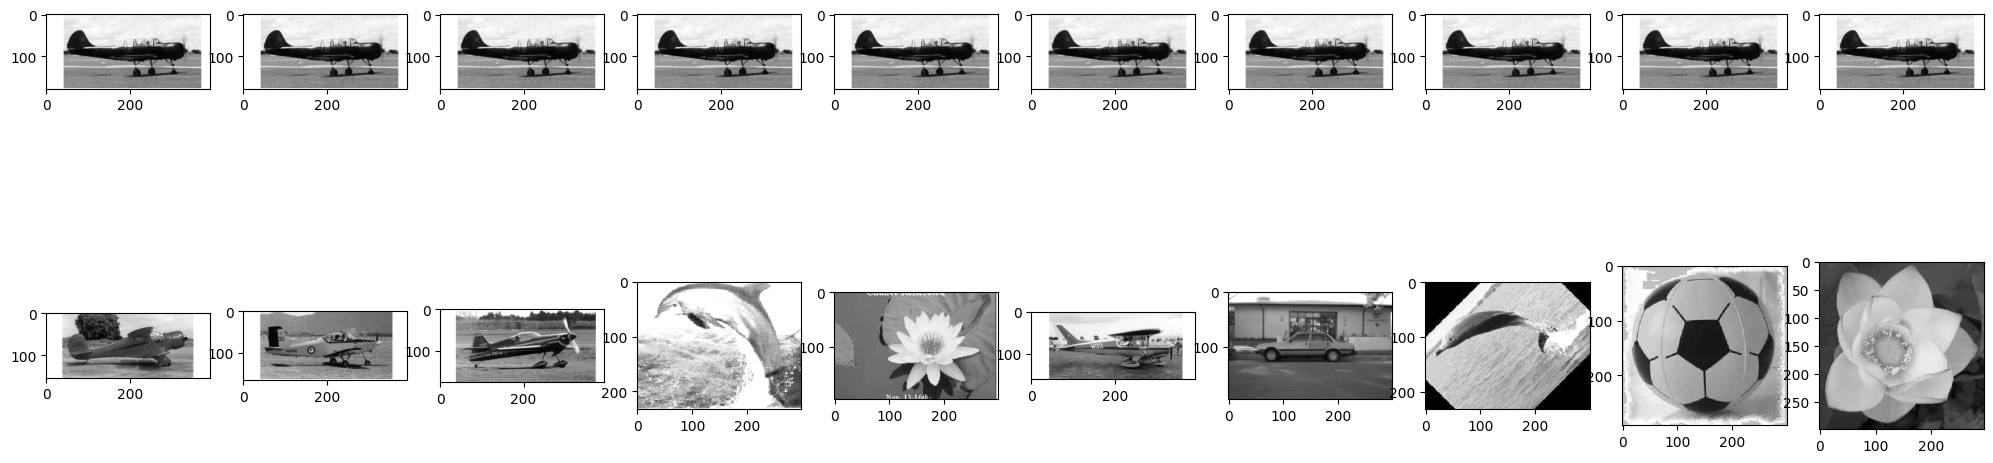

In [46]:
f, axarr = plt.subplots(2, 10, figsize=(25,7))
for i in range(len(best)):
  axarr[0,i].imshow(query_image,cmap = plt.get_cmap('gray'))
  axarr[1,i].imshow(image_database[best[i]],cmap = plt.get_cmap('gray'))
plt.show()

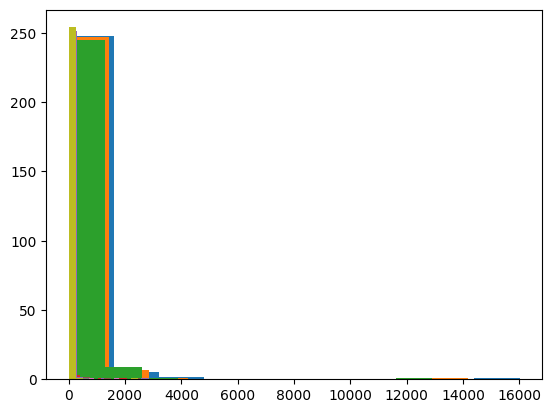

In [47]:
#P and R study
P = [8 ,16 ,24]
R = [1 ,2, 3]
PRStudy = {}
ind_track = []
ind = 0
for i in range(len(P)):
  for j in range(len(R)):
    PRStudy[ind] = LBPAnalysis(query_image,image_database,P[i],R[j])
    ind_track.append([P[i],R[j]])
    ind+=1

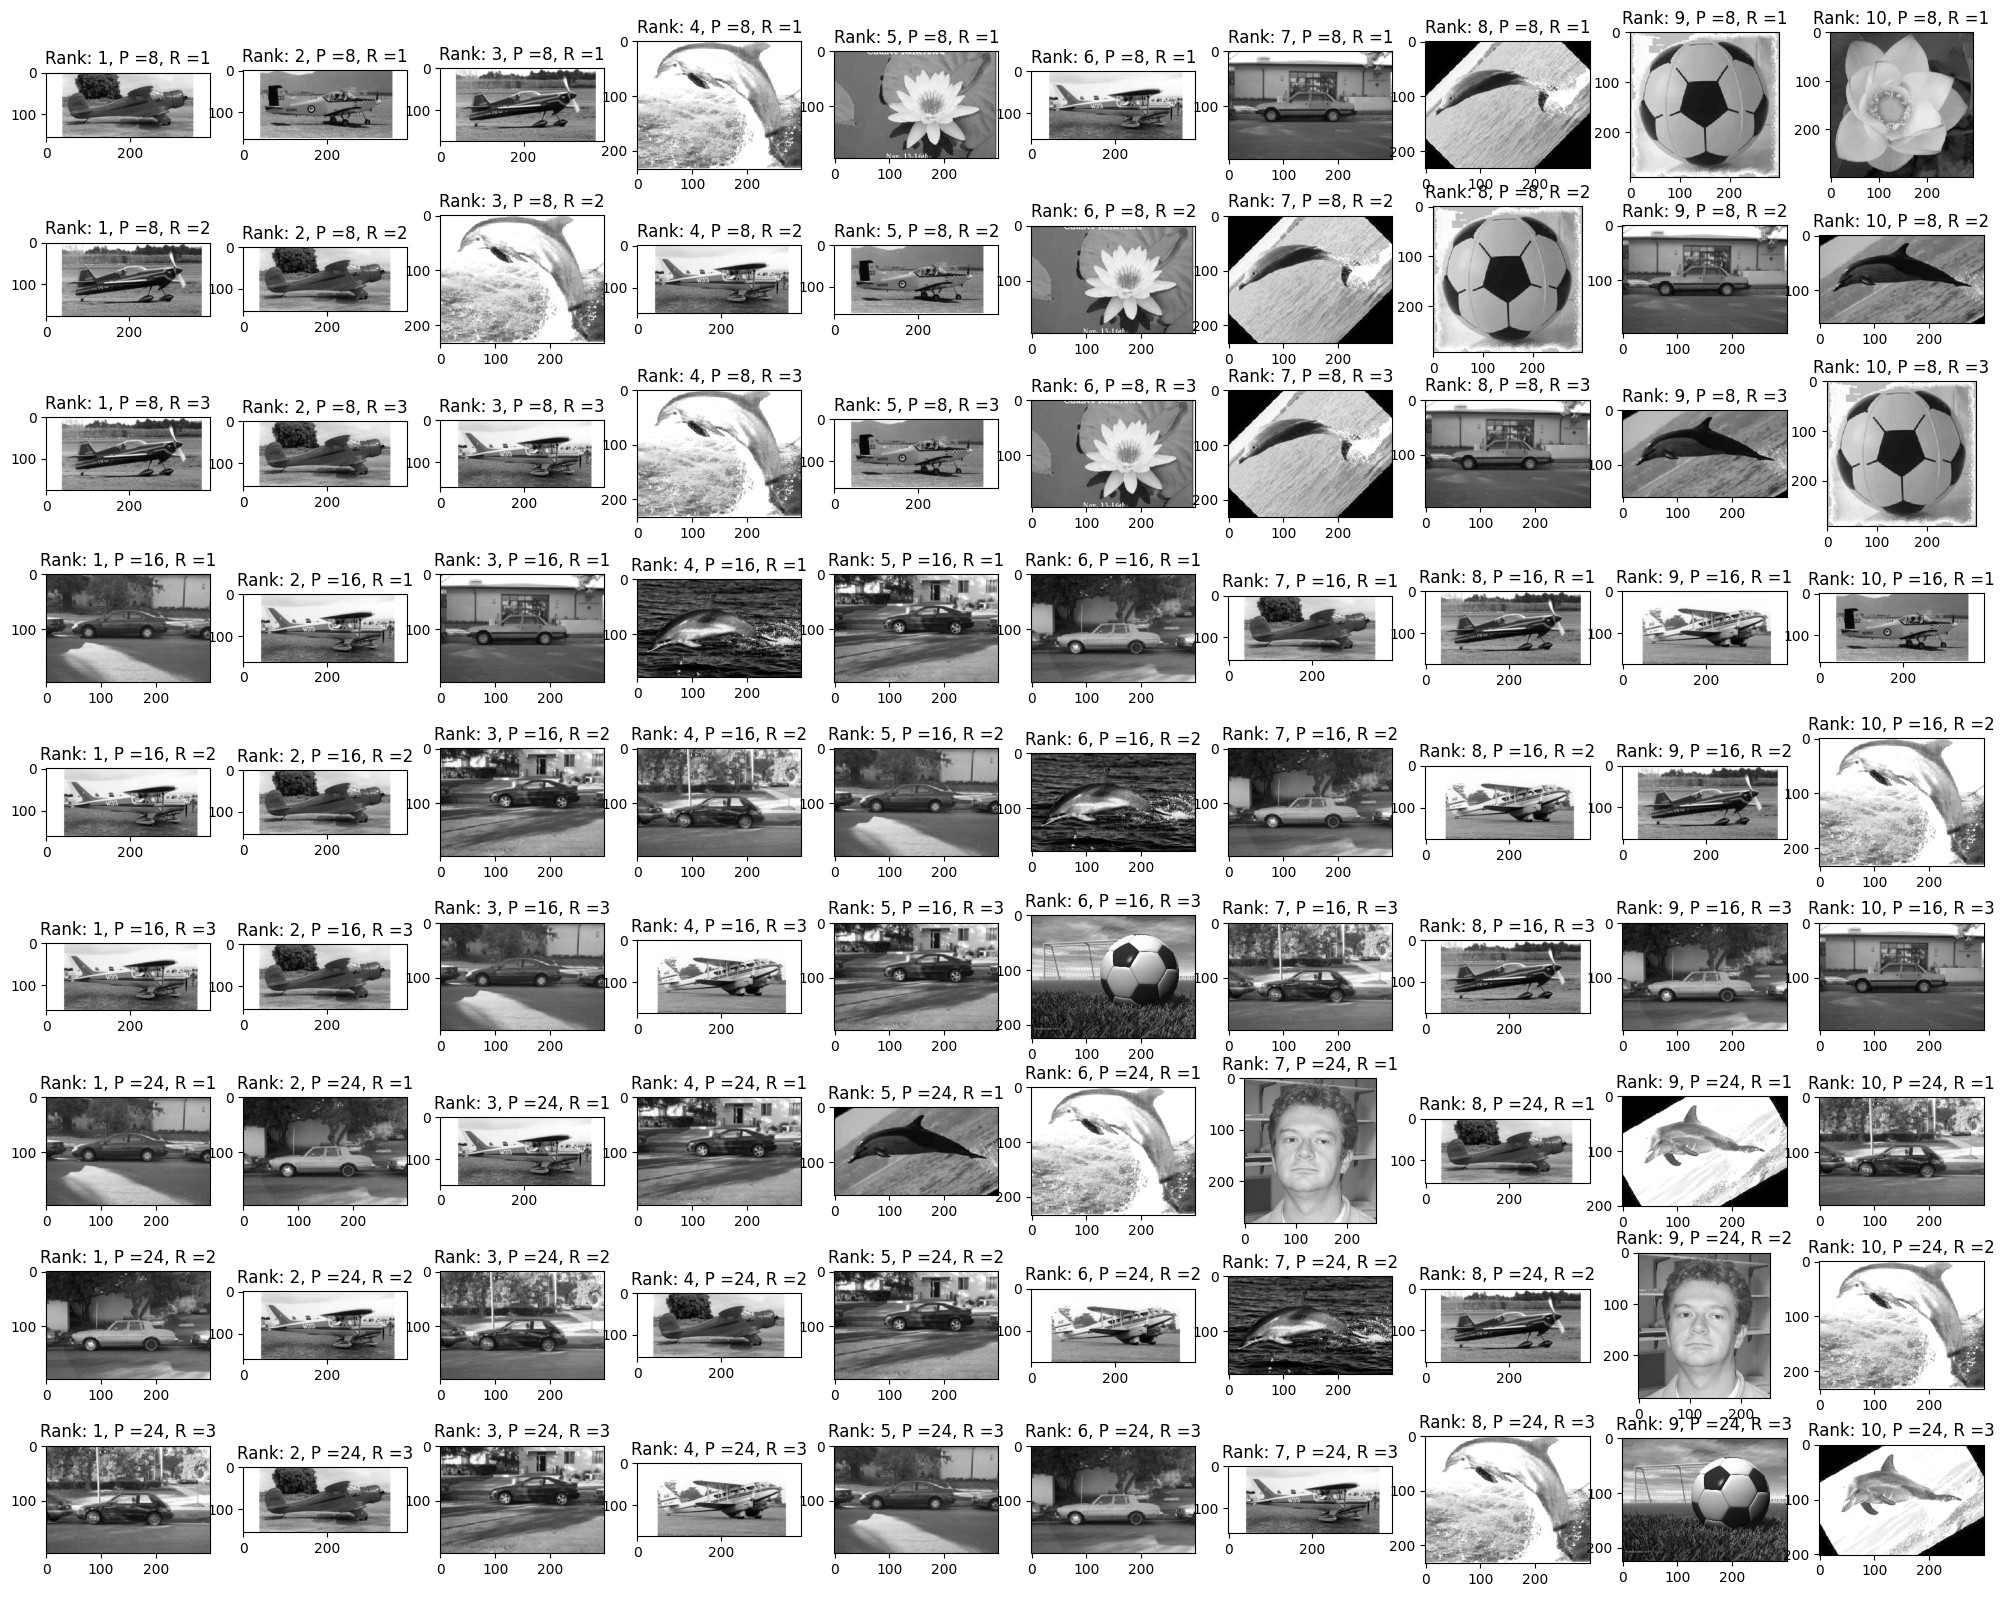

In [48]:
f, axarr = plt.subplots(9, 10, figsize=(25,20))

for i in range(len(PRStudy)):
  #axarr[0,i].imshow(query_image,cmap = plt.get_cmap('gray'))
  j = 0
  for j in range(len(PRStudy[0])):
    axarr[i,j].imshow(image_database[PRStudy[i][j]],cmap = plt.get_cmap('gray'))
    axarr[i,j].set_title('Rank: ' +str(j+1)+ ', P =' +str(ind_track[i][0])+ ', R =' +str(ind_track[i][1]))

plt.show()

In [ ]:
#brightness study
from PIL import Image, ImageEnhance
img = Image.open("airplane_query.jpg").convert("L")
img_enhancer = ImageEnhance.Brightness(img)
factor = 2
bright_query = np.array(img_enhancer.enhance(factor))


brightimage_dictionary = {}
directory = 'database'
files = os.listdir(directory)

%cd 'database'
index = 0
while index < len(files):
    filename = files[index]
    if filename.endswith('.jpg'):
      img = Image.open(filename).convert("L")
      img_enhancer = ImageEnhance.Brightness(img)
      brightimage_dictionary[index] = np.array(img_enhancer.enhance(factor))
    index += 1
%cd ..

/content/gdrive/MyDrive/TP1_data/database
/content/gdrive/MyDrive/TP1_data


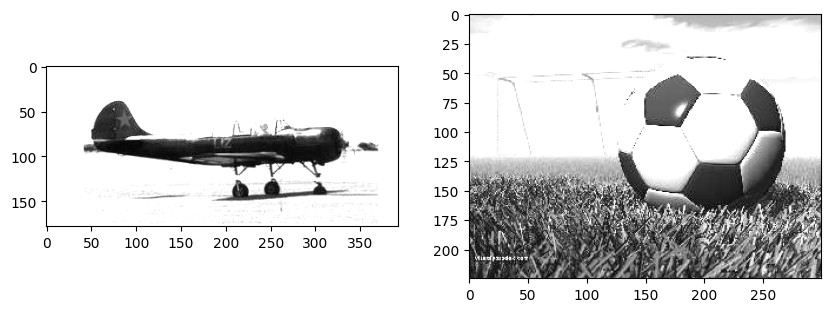

In [49]:
#show bright dictionary was successful
f, axarr = plt.subplots(1, 2, figsize=(10,10))
axarr[0].imshow(bright_query,cmap = plt.get_cmap('gray'))
axarr[1].imshow(brightimage_dictionary[25],cmap = plt.get_cmap('gray'))
plt.show()

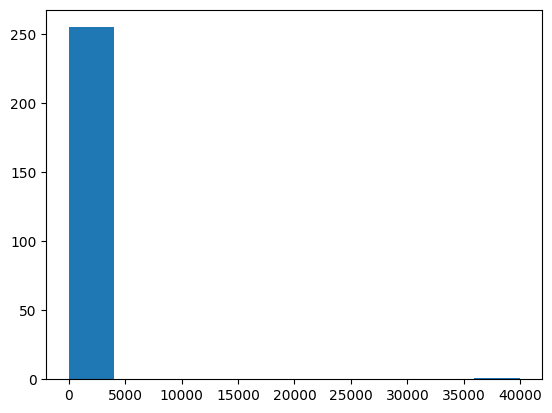

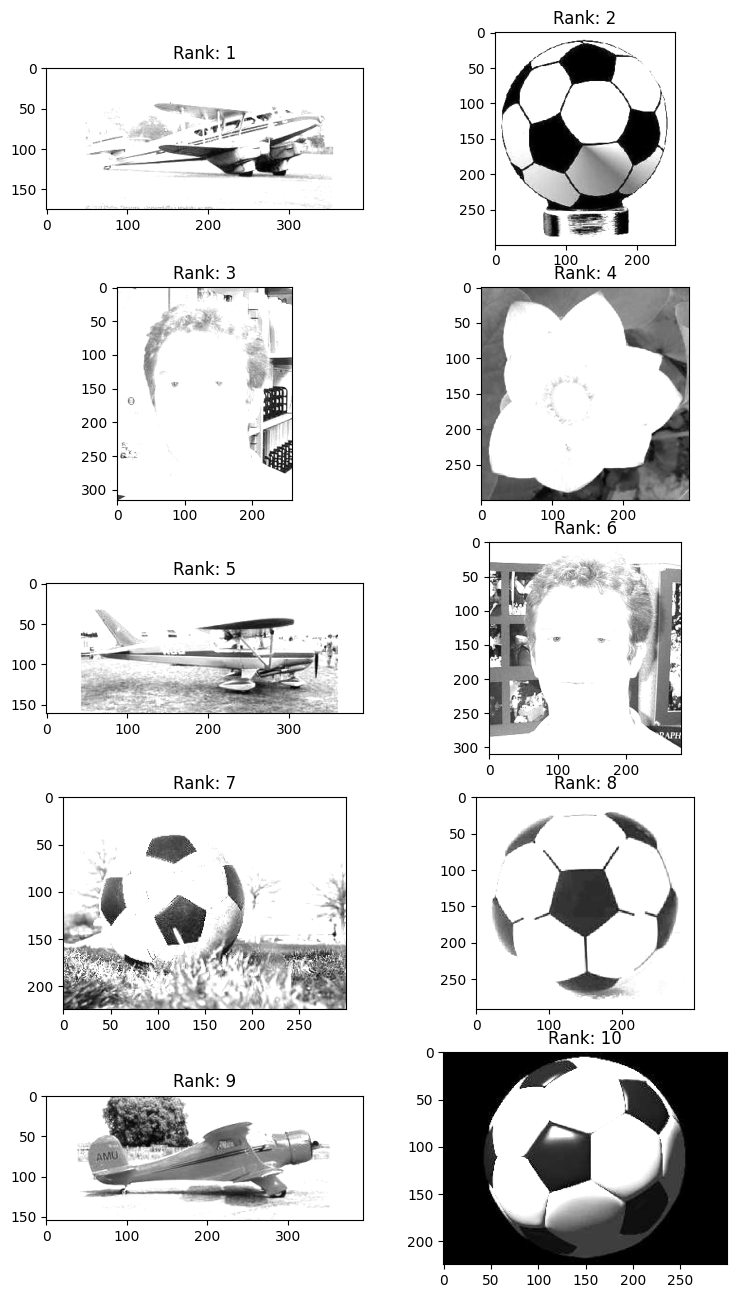

In [50]:
best_bright = LBPAnalysis(bright_query,brightimage_dictionary,P=8,R=3)
f, axarr = plt.subplots(5, 2, figsize=(9,16))
ind = 0
for i in range(5):
  for j in range(2):
    axarr[i,j].imshow(brightimage_dictionary[best_bright[ind]],cmap = plt.get_cmap('gray'))
    ind+=1
    axarr[i,j].set_title('Rank: ' +str(ind))
plt.show()

In [51]:
#rotation study
rotated_query_image = cv2.imread("airplane1_query.jpg",cv2.IMREAD_GRAYSCALE)
rotated_image_dictionary = {}
directory = 'rotation'
files = os.listdir(directory)
%cd 'rotation'
index = 0
while index < len(files):
    filename = files[index]
    if filename.endswith('.jpg'):
        rotated_image_dictionary[index] = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    index += 1
%cd ..

/content/gdrive/MyDrive/TP1_data/TP1_data/rotation
/content/gdrive/MyDrive/TP1_data/TP1_data


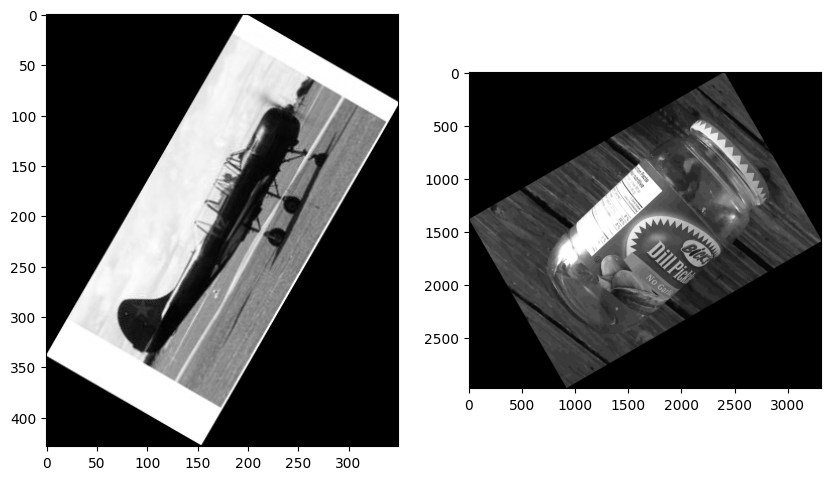

In [52]:
#plot images to show they are uploaded successfully and what they should look like example
f, axarr = plt.subplots(1, 2, figsize=(10,10))
axarr[0].imshow(rotated_query_image,cmap = plt.get_cmap('gray'))
axarr[1].imshow(rotated_image_dictionary[36],cmap = plt.get_cmap('gray'))
plt.show()

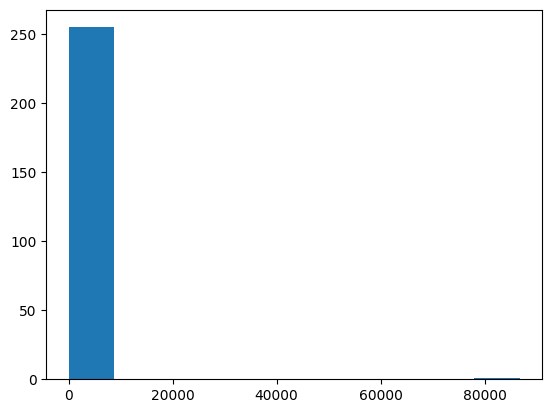

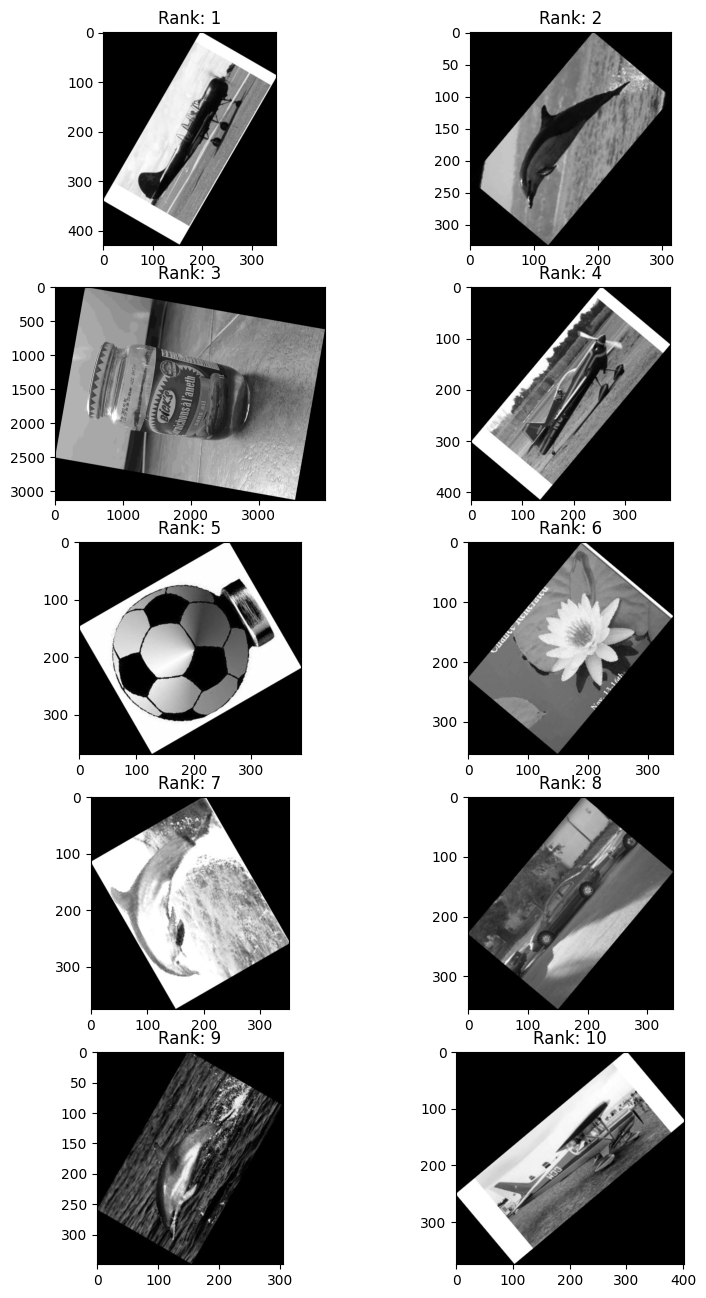

In [53]:
best_rotate = LBPAnalysis(rotated_query_image, rotated_image_dictionary,P=8,R=3)
f, axarr = plt.subplots(5, 2, figsize=(9,16))
ind = 0
for i in range(5):
  for j in range(2):
    axarr[i,j].imshow(rotated_image_dictionary[best_rotate[ind]],cmap = plt.get_cmap('gray'))
    ind+=1
    axarr[i,j].set_title('Rank: ' +str(ind))
plt.show()

In [54]:
#bounding box study
bounding_query_image = cv2.imread("bounding_query.jpg",cv2.IMREAD_GRAYSCALE)
bounding_image_dictionary = {}
directory = 'box'
files = os.listdir(directory)
%cd 'box'
index = 0
while index < len(files):
    filename = files[index]
    if filename.endswith('.jpg'):
        bounding_image_dictionary[index] = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    index += 1
%cd ..

/content/gdrive/MyDrive/TP1_data/TP1_data/box
/content/gdrive/MyDrive/TP1_data/TP1_data


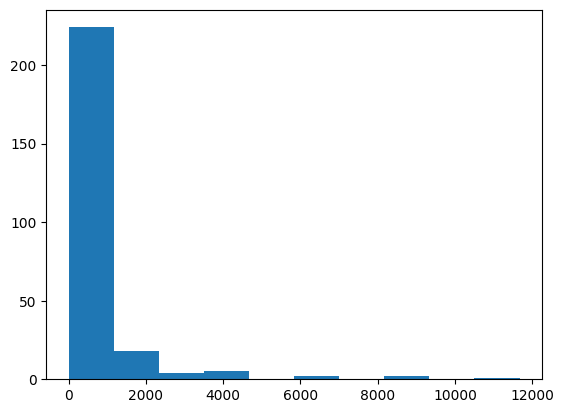

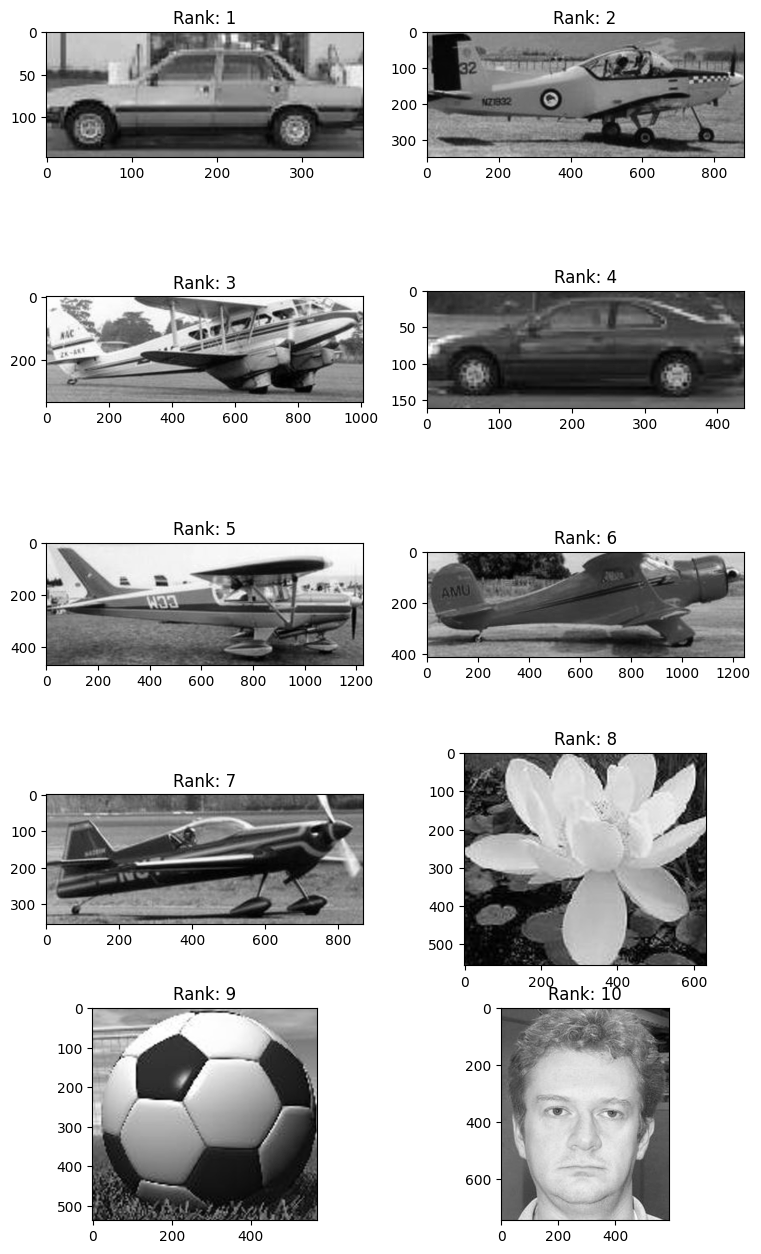

In [55]:
best_bounding = LBPAnalysis(bounding_query_image, bounding_image_dictionary,P=8,R=3)
f, axarr = plt.subplots(5, 2, figsize=(9,16))
ind = 0
for i in range(5):
  for j in range(2):
    axarr[i,j].imshow(bounding_image_dictionary[best_bounding[ind]],cmap = plt.get_cmap('gray'))
    ind+=1
    axarr[i,j].set_title('Rank: ' +str(ind))
plt.show()